# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2023
## deadline: 15.2.2023 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Usairim Isani

Student number: 2206784

Student email: muisan@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=5 (5NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 5-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 5NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 5NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 5-nearest neighbor and Euclidean distance calculation you can use third-party libraries (e.g. Scikit-learn) if you want. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [17]:
# In this cell, import all the libraries that you need. For example: 
import scipy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

### Read in the datasets

In [18]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points.  


inputs_df = pd.read_csv('input.csv', header = None)
outputs_df = pd.read_csv('output.csv', header = None)
coordinates_df = pd.read_csv('coordinates.csv', header = None)


print(f'Inputs Rows: {inputs_df.shape[0]} Columns {inputs_df.shape[1]}')
print(f'Outputs Rows: {outputs_df.shape[0]} Columns {outputs_df.shape[1]}')
print(f'Coordinates Rows: {coordinates_df.shape[0]} Columns {coordinates_df.shape[1]}')

Inputs Rows: 1691 Columns 75
Outputs Rows: 1691 Columns 1
Coordinates Rows: 1691 Columns 2


### Standardization of the predictor features (input.csv)

In [19]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 

scaler = StandardScaler()
inputs_df = pd.DataFrame(scaler.fit_transform(inputs_df))
inputs_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,0.219541,0.539119,-0.645254,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,0.219541,-0.169259,-0.645254,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315
3,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933
4,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,-1.047724,-0.877636,2.098494,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584


### Functions

In [20]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.

def cindex(true_labels, pred_labels):
    """Returns C-index between true labels and predicted labels"""  
    n = 0
    h_num = 0 
    for i in range(0, len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1, len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n

def LeaveOneOut(data):
    data = [*range(data)]
    for i in data:
        test_index = i
        train_index = []

        for j in data:
            if j != test_index:
                train_index.append(j)
        yield train_index, test_index

 # Function to calculate distance of test coordinates with all the coordinates from training set and removing those which fall within the distance
def filterTrainIndex(train_indexes, test_index, distance):
    
    filtered_train_indexes = []    
    for train_index in train_indexes:
        x1, y1, x2, y2 = coordinates_df.loc[test_index, 0], coordinates_df.loc[test_index, 1], coordinates_df.loc[train_index, 0], coordinates_df.loc[train_index, 1]
        # selecting only those training indexes which do not fall within the distance 
        if scipy.spatial.distance.euclidean([x1, y1], [x2, y2]) > distance:
            filtered_train_indexes.append(train_index)
            
    return filtered_train_indexes

### Results for spatial leave-one-out cross-validation with 5-nearest neighbor regression model

In [21]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 5-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

distances = [*range(0, 251, 10)]

knn = KNeighborsRegressor(n_neighbors = 5)

c_indexes = []
for distance in distances:
    predictions, true_labels = [], []
    
    for _, (train_indexes, test_index) in enumerate(LeaveOneOut(inputs_df.shape[0])):
        
        filtered_train_indexes = filterTrainIndex(train_indexes, test_index, distance)
        
        X_train, y_train = inputs_df.loc[filtered_train_indexes].values, outputs_df.loc[filtered_train_indexes].values
        X_test, y_test = inputs_df.loc[test_index].values, outputs_df.loc[test_index].values[0]
        
        knn.fit(X_train, y_train)
        
        prediction = knn.predict(X_test.reshape(1,-1))[0][0]
        predictions.append(prediction)
        true_labels.append(y_test)
        
    c_index = cindex(true_labels, predictions)
    c_indexes.append(c_index)

    print(f'The C-Index is {c_index} when distance is {distance}\n\n')


The C-Index is 0.7126814115064627 when distance is 0


The C-Index is 0.7033751254673967 when distance is 10


The C-Index is 0.7070117550876417 when distance is 20


The C-Index is 0.7056566372077852 when distance is 30


The C-Index is 0.698309532442334 when distance is 40


The C-Index is 0.6921366065216448 when distance is 50


The C-Index is 0.6911020692146056 when distance is 60


The C-Index is 0.6862671122129999 when distance is 70


The C-Index is 0.6835929242687893 when distance is 80


The C-Index is 0.6820614170781251 when distance is 90


The C-Index is 0.6803458210432448 when distance is 100


The C-Index is 0.6372616819420743 when distance is 110


The C-Index is 0.6169996598206149 when distance is 120


The C-Index is 0.6016712887199036 when distance is 130


The C-Index is 0.5980840061092297 when distance is 140


The C-Index is 0.5947095106036574 when distance is 150


The C-Index is 0.5951613332232066 when distance is 160


The C-Index is 0.5951263353440781 when dist

### Interpretation of the results

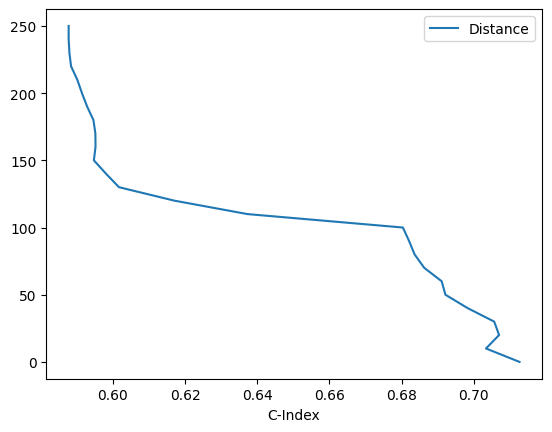

In [22]:
# In this cell, give a brief commentary on the results, what happens to the prediction 
# performance as the prediction distance increases?

df = pd.DataFrame(zip(distances, c_indexes), columns=["Distance", "C-Index"])
ax = df.plot.line(x="C-Index", y="Distance", )